- **Thuật toán K-Nearest Neighbors (KNN) (K láng giềng gần nhất)**
  - **Định nghĩa đơn giản**:
    - KNN là thuật toán dựa vào các ví dụ "gần nhất" trong dữ liệu đã có.
    - Khi cần dự đoán cho một trường hợp mới, KNN sẽ tìm k trường hợp trước đó có các yếu tố tương tự và xem kết quả là gì.
    - Dựa trên kết quả này, KNN đưa ra dự đoán cho trường hợp mới.
  - **Ví dụ đơn giản**:
    - Giả sử một học sinh muốn dự đoán điểm số của mình trong lần thi sắp tới.
    - Em ấy có thể tìm điểm số của những lần thi gần nhất mà điều kiện học tập của em ấy tương tự (thời gian học, số lần ôn tập, vv).
    - Dựa vào các điểm số trước đó, em ấy có thể ước lượng điểm thi sắp tới của mình.
  - **Ứng dụng vào dự đoán xác suất lũ lụt**:
    - Trong bài toán dự đoán lũ, KNN sẽ xem xét những ngày trong quá khứ có điều kiện thời tiết, cường độ mưa, và các yếu tố tương tự.
    - Ví dụ, nếu có một ngày nào đó có lượng mưa và độ ẩm giống với những ngày trước đó đã từng xảy ra lũ, KNN sẽ dự đoán rằng ngày mới này cũng có nguy cơ cao xảy ra lũ lụt.

# 0. CHUẨN HÓA DỮ LIỆU - Nhận xét tại notebook 1


### **1. Chuẩn hóa là gì?**
Chuẩn hóa là kỹ thuật chuyển đổi các giá trị của dữ liệu về cùng một phạm vi, thường là từ **0 đến 1** hoặc biến đổi để có giá trị trung bình là **0** và độ lệch chuẩn là **1**.

### **2. Giải thích chuẩn hóa một cách dễ hiểu (Ví dụ về bài toán giá nhà)**

Hãy tưởng tượng chúng ta đang xây dựng một mô hình để **dự đoán giá nhà**, với các yếu tố sau:
- **Diện tích nhà:** Tính bằng **mét vuông**, thường có giá trị từ 50 đến 500 m².
- **Khoảng cách tới trung tâm thành phố:** Tính bằng **kilômét**, thường có giá trị từ 1 đến 50 km.
- **Số phòng ngủ:** Là số nguyên, thường từ 1 đến 5.

---

### **Tại sao cần chuẩn hóa?**

#### **Thang đo không đồng nhất:**
- Diện tích nhà có giá trị từ **50 đến 500**, quá lớn so với các yếu tố khác.
- Khoảng cách tới trung tâm chỉ từ **1 đến 50**.
- Số phòng ngủ từ **1 đến 5**.

Khi mô hình học, nó sẽ coi **diện tích nhà** là yếu tố quan trọng nhất chỉ vì giá trị của nó **lớn hơn**, dù trong thực tế, **khoảng cách tới trung tâm** có thể ảnh hưởng lớn hơn đến giá nhà.

#### **Giải pháp: Chuẩn hóa dữ liệu**
Quy đổi tất cả các yếu tố về cùng một phạm vi (0 đến 1). Ví dụ:
- **Diện tích nhà:** Nếu là 250 m² (giữa khoảng 50-500), sẽ trở thành **0.5**.
- **Khoảng cách tới trung tâm:** Nếu là 25 km (giữa khoảng 1-50), sẽ trở thành **0.5**.
- **Số phòng ngủ:** Nếu là 3 (giữa khoảng 1-5), sẽ trở thành **0.5**.

Khi đó, mô hình sẽ đánh giá các yếu tố **dựa trên mối quan hệ thực sự** thay vì kích thước giá trị của chúng.

---

### **3. Ứng dụng chuẩn hóa vào bài toán dự đoán bão lũ**

Trong bài toán dự đoán xác suất lũ lụt, chúng ta cũng có nhiều yếu tố với **thang đo khác nhau**. Ví dụ:
- **Lượng mưa:** Có giá trị lớn, từ 0 đến vài ngàn mm.
- **Chất lượng đê điều:** Là số điểm từ 0 đến 10.
- **Mật độ dân số:** Có thể dao động từ vài chục đến hàng nghìn người/km².

#### **Vấn đề nếu không chuẩn hóa:**
- **Lượng mưa** có giá trị lớn sẽ được mô hình coi là yếu tố quan trọng nhất, ngay cả khi nó không phải yếu tố quyết định duy nhất.
- Các yếu tố như chất lượng đê điều, dù quan trọng, có giá trị nhỏ hơn, sẽ bị **bỏ qua**.

#### **Lợi ích khi chuẩn hóa:**
- **Tất cả các yếu tố đều được đánh giá công bằng.**
- Mô hình Linear Regression hoặc các biến thể như Ridge, Lasso sẽ chính xác hơn khi tính toán hệ số (coefficients) cho từng yếu tố.
- Giảm nguy cơ mô hình "hiểu nhầm" về tầm quan trọng của các biến.

---

### **Kết luận:**
Chuẩn hóa không chỉ giúp mô hình hoạt động chính xác hơn mà còn đảm bảo rằng các yếu tố trong bài toán **được đánh giá công bằng**. Trong bài toán dự đoán lũ lụt, việc chuẩn hóa các yếu tố như lượng mưa, chất lượng đê điều, và mật độ dân số sẽ giúp mô hình phản ánh đúng thực tế hơn và đưa ra dự đoán đáng tin cậy.

# Basic KNN

In [1]:
!pip install pandas numpy scikit-learn


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


# 1. Đọc dữ liệu
try:
    flood_data = pd.read_csv('train.csv')
    print("Dataset loaded successfully from Local: 'train.csv'.")
except FileNotFoundError:
    try:
        flood_data = pd.read_csv('/content/train.csv')
        print("Dataset loaded successfully from Google Colab: '/content/train.csv'.")
    except FileNotFoundError:
        print("Dataset not found in either specified path.")

# Lấy 1 bộ nhỏ để thử chạy
sampleflood_data = flood_data[:1000]

X = sampleflood_data.drop('FloodProbability', axis=1)  # Tất cả các features
y = sampleflood_data['FloodProbability']  # Biến mục tiêu

# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo mô hình KNN với k=3
knn = KNeighborsRegressor(n_neighbors=3, weights='distance')
knn.fit(X_train_scaled, y_train)

# Dự đoán
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Đánh giá mô hình
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Train R² Score:", r2_score(y_train, y_train_pred))
print("Test R² Score:", r2_score(y_test, y_test_pred))


Dataset loaded successfully from Local: 'train.csv'.
Train RMSE: 1.1368572023425654e-09
Test RMSE: 0.04054076156925334
Train R² Score: 0.9999999999999994
Test R² Score: 0.3037838734799907


## Chạy hết bộ lớn khá lâu


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


# 1. Đọc dữ liệu
try:
    flood_data = pd.read_csv('train.csv')
    print("Dataset loaded successfully from Local: 'train.csv'.")
except FileNotFoundError:
    try:
        flood_data = pd.read_csv('/content/train.csv')
        print("Dataset loaded successfully from Google Colab: '/content/train.csv'.")
    except FileNotFoundError:
        print("Dataset not found in either specified path.")

# # Lấy 1 bộ nhỏ để thử chạy
# sampleflood_data = flood_data

X = flood_data.drop('FloodProbability', axis=1)  # Tất cả các features
y = flood_data['FloodProbability']  # Biến mục tiêu

# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo mô hình KNN với k=3
knn = KNeighborsRegressor(n_neighbors=3, weights='distance')
knn.fit(X_train_scaled, y_train)

# Dự đoán
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Đánh giá mô hình
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Train R² Score:", r2_score(y_train, y_train_pred))
print("Test R² Score:", r2_score(y_test, y_test_pred))


Dataset loaded successfully from Local: 'train.csv'.


SAU 32 PHÚT CHẠY, TA THU ĐƯỢC KẾT QUẢ:
```
Train RMSE: 1.2518130869377174e-09
Test RMSE: 0.031842760655068955
Train R² Score: 0.9999999999999994
Test R² Score: 0.6099863954320361
```

Kết quả KNN cho thấy bị overfitting khá nhiều (tức là kết quả CÓ HIỆU SUẤT CAO:0.999 trên tập TRAIN, nhưng lại CHO KẾT QUẢ KHÔNG TỐT trên tập TEST).

### Đóng gói metrics: 

### Huấn luyện mô hình KNN với Grid Search

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

# 1. Đọc dữ liệu
try:
    flood_data = pd.read_csv('train.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Dataset not found. Please check the file path.")

# 2. Chuẩn bị dữ liệu
X = flood_data.drop(['id', 'FloodProbability'], axis=1)
y = flood_data['FloodProbability']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Giảm chiều dữ liệu với PCA (giữ 95% phương sai)
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)


Dataset loaded successfully.


In [3]:

# 3. Khởi tạo GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # Manhattan (p=1), Euclidean (p=2)
    'algorithm': ['kd_tree', 'ball_tree'],  # Sử dụng thuật toán tối ưu
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Huấn luyện với GridSearchCV
grid_search.fit(X_train_reduced, y_train)

# 4. Kết quả GridSearch
print("\n=== Kết Quả Grid Search ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Negative MSE: {grid_search.best_score_}")




Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [6]:
# 5. Đánh giá hiệu suất mô hình
best_knn = grid_search.best_estimator_
y_train_pred = best_knn.predict(X_train_reduced)
y_test_pred = best_knn.predict(X_test_reduced)


# Tính toán các chỉ số đánh giá
metrics = {
    'Train R²': r2_score(y_train, y_train_pred_knn),
    'Test R²': r2_score(y_test, y_test_pred_knn),
    'Train MSE': mean_squared_error(y_train, y_train_pred_knn),
    'Test MSE': mean_squared_error(y_test, y_test_pred_knn),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred_knn)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_knn)),
    'Train MAE': mean_absolute_error(y_train, y_train_pred_knn),
    'Test MAE': mean_absolute_error(y_test, y_test_pred_knn),
}

print("\n=== Chỉ Số Đánh Giá ===")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")



=== Chỉ Số Đánh Giá ===
Train R²: 1.0000
Test R²: 0.4077
Train MSE: 0.0000
Test MSE: 0.0014
Train RMSE: 0.0000
Test RMSE: 0.0374
Train MAE: 0.0000
Test MAE: 0.0300


Trực quan hóa kết quả

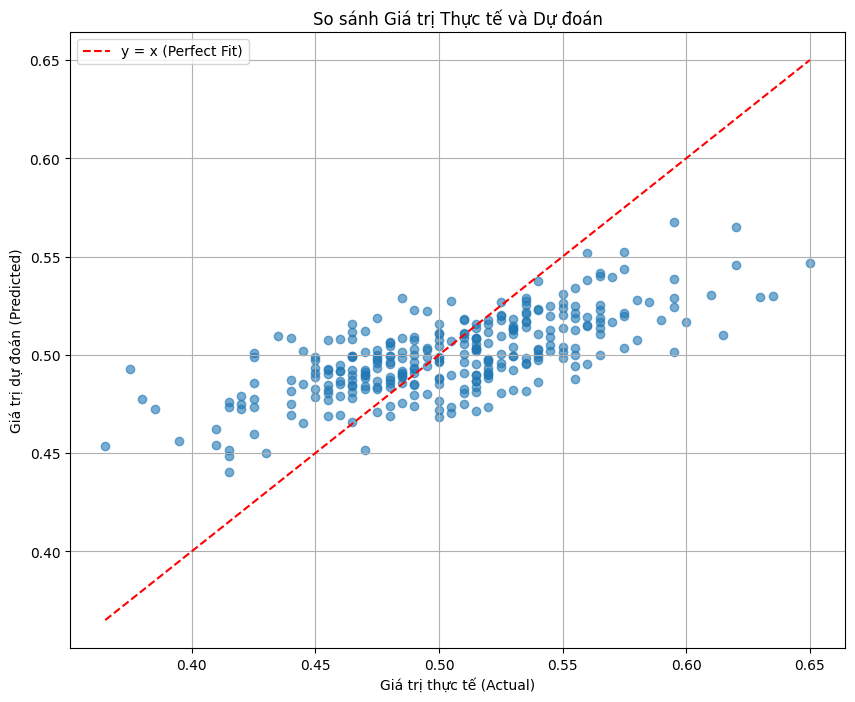

In [7]:
import matplotlib.pyplot as plt

# Trực quan hóa kết quả mô hình
plt.figure(figsize=(10, 8))

# Biểu đồ Scatter Plot
plt.scatter(y_test, y_test_pred_knn, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y = x (Perfect Fit)')
plt.xlabel('Giá trị thực tế (Actual)')
plt.ylabel('Giá trị dự đoán (Predicted)')
plt.title('So sánh Giá trị Thực tế và Dự đoán')
plt.legend()
plt.grid(True)
plt.show()




### **1. Biểu đồ phân phối sai số (Residual Plot)**
Để kiểm tra sự phân bố sai số dự đoán giữa giá trị thực tế và giá trị dự đoán:
```python
# Residual plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_test_pred_knn
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Biểu đồ Phân Phối Sai Số (Residuals)')
plt.xlabel('Sai số (Giá trị thực - Giá trị dự đoán)')
plt.ylabel('Tần suất')
plt.show()
```




### **2. Biểu đồ Scatter Plot giá trị thực tế vs dự đoán (được cải tiến)**
Thêm màu sắc và kích thước điểm để biểu đồ trực quan hơn:
```python
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_knn, alpha=0.6, color='purple', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Đường y=x (Perfect Fit)')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('So sánh Giá trị Thực tế và Dự đoán - KNN Regression')
plt.legend()
plt.show()
```

### **3. Biểu đồ sai số theo giá trị thực tế**
Kiểm tra sự thay đổi sai số theo giá trị thực tế:
```python
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6, color='green')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Sai số (Residuals)')
plt.title('Sai số theo Giá trị Thực tế')
plt.show()
```

### **4. Biểu đồ Boxplot kiểm tra độ lệch**
So sánh sự khác biệt giữa giá trị thực tế và giá trị dự đoán qua Boxplot:
```python
plt.figure(figsize=(10, 6))
sns.boxplot(data=[y_test.values, y_test_pred_knn], palette='Set3')
plt.xticks([0, 1], ['Giá trị thực tế', 'Giá trị dự đoán'])
plt.title('So sánh Giá trị Thực tế và Dự đoán - Boxplot')
plt.ylabel('Giá trị')
plt.show()
```

